In [1]:
# Load packakages

In [101]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.metrics import confusion_matrix 
import pandas as pd 
import sklearn
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,f1_score
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import ClusterCentroids
from sklearn.neural_network import MLPClassifier

In [61]:
cc_df=pd.read_csv("Data/creditcard.csv")
#cc_df['Date'] = pd.to_datetime(cc_df['Time'],unit='s')
#cc_df.drop(columns=['Time'],axis=1)
print(cc_df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [62]:
print(cc_df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [63]:
cc_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


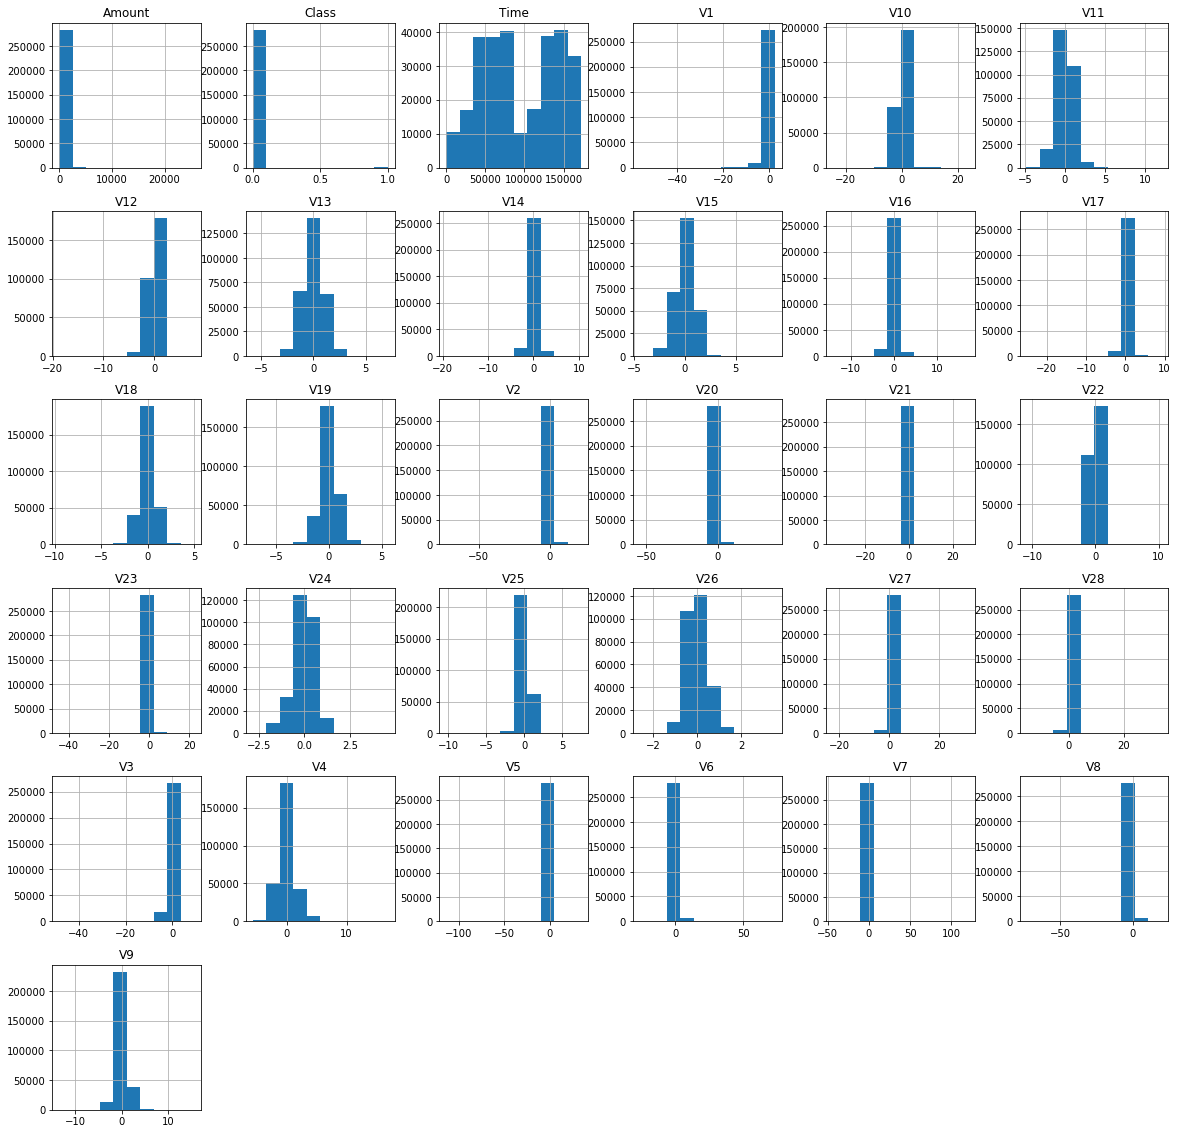

In [64]:
# plot the histogram of each parameter
cc_df.hist(figsize = (20, 20))
plt.show()

In [65]:
# You can see most of the V's are clustered around 0 with some or no outliers. 
# Notice we have very few fraudulent cases over valid cases in our class histogram.

In [66]:
# determine the number of fraud cases
fraud = cc_df[cc_df['Class'] == 1]
valid = cc_df[cc_df['Class'] == 0]

outlier_fraction = len(fraud) / float(len(valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))

0.0017304750013189597
Fraud Cases: 492
Valid Cases: 284315


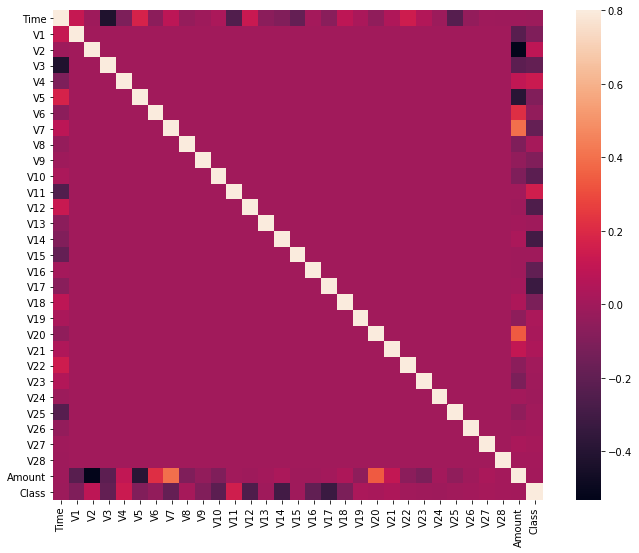

In [67]:
# correlation matrix
corrmat = cc_df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [68]:
# You can see a lot of the values are close to 0 . Most of them are fairly unrelated. 
# The lighter squares signify a stronger correlation.

In [69]:
## Organizing the Data

In [70]:
# get the columns from the dataframe
columns = cc_df.columns.tolist()

# filter the columns to remove the data we do not want
columns = [c for c in columns if c not in ['Class']]

# store the variable we will be predicting on which is class
target = 'Class'

# X includes everything except our class column
X = cc_df[columns]
# Y includes all the class labels for each sample
# this is also one-dimensional
Y = cc_df[target]

# print the shapes of X and Y
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [71]:
print(X)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [72]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64


In [73]:
# Applying Algorithms

In [74]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [75]:
# define a random state
random_state = 42

# define the outlier detection methods
classifiers = {
    # contamination is the number of outliers we think there are
    'Isolation Forest': IsolationForest(max_samples = len(X),
                                       contamination = outlier_fraction,
                                       random_state = random_state),
    # number of neighbors to consider, the higher the percentage of outliers the higher you want to make this number
    'Local Outlier Factor': LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction)
}

In [76]:
# Fit the Model


In [77]:
n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    # reshape the prediction values to 0 for valid and 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    # calculate the number of errors
    n_errors = (y_pred != Y).sum()
    
    # classification matrix
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 679
0.9976159293837581
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.31      0.31      0.31       492

    accuracy                           1.00    284807
   macro avg       0.65      0.65      0.65    284807
weighted avg       1.00      1.00      1.00    284807

Local Outlier Factor: 935
0.9967170750718908
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807



In [78]:
#Looking at precision for fraudulent cases (1) lets us know the percentage of cases that are getting correctly labeled. 
# 'Precision' accounts for false-positives. 'Recall' accounts for false-negatives. 
# Low numbers could mean that we are constantly calling clients asking them if they actually made the 
# transaction which could be annoying.


# Isolation Forest method (which is Random Forest based) was able to produce a better result. 
#Looking at the f1-score 30% of the time we are going to detect the fraudulent transactions.

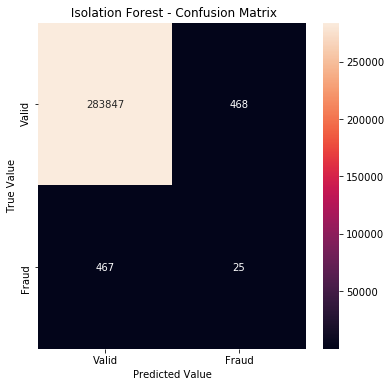

In [80]:
labels= ['Valid', 'Fraud'] 
conf_matrix=confusion_matrix(Y, y_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title(" Isolation Forest - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

In [82]:
roc_auc_score(Y, y_pred)

0.5245834732717304

In [83]:
f1_score(Y, y_pred)

0.050761421319796954

In [38]:
# XGBOOST


In [39]:

# Split into Train / Test Sets
x=cc_df.drop(columns='Class',axis=1)
print(x)

y=cc_df[['Class']].copy()
print(y)

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [40]:
# Oversampling (Smote) + Random Forest 
xsmote,ysmote=SMOTE(random_state=1,sampling_strategy=1.0).fit_resample(xtrain,ytrain)

print(xsmote)
print(ysmote)

                 Time         V1        V2         V3        V4        V5  \
0       159708.000000  -0.459482  1.198230   2.315423  4.274698  0.603004   
1       129139.000000   1.878563  0.020785  -1.621113  2.908813  2.507847   
2         4263.000000  -1.467414  1.210542   1.891733 -0.282189 -0.214526   
3       113041.000000   2.073474 -0.147624  -1.495803  0.184499  0.107505   
4        77352.000000   1.097497  0.357207   1.051187  2.631217 -0.464023   
...               ...        ...       ...        ...       ...       ...   
426443   41233.586829 -10.355998  6.092424 -13.081348  7.333507 -9.550066   
426444   35886.873089  -2.813944  3.771450  -3.775914  5.561832 -3.589699   
426445  143237.936649  -1.408302  2.508873  -2.686728  4.111950  0.516272   
426446  129738.321857  -1.581447  2.974258  -6.213306  3.656808 -0.810412   
426447  150719.013410  -0.261952  1.361121  -2.416682  3.613812  0.951105   

              V6         V7        V8        V9  ...       V20       V21  \

In [41]:
import xgboost as xgb

xgb=xgb.XGBClassifier(
    learning_rate=0.001,
    max_depth=2,
    n_estimators=100,
    scale_pos_weight=5)

In [42]:
# No sampling
xgb.fit(xtrain,ytrain.values.ravel())
xgb_pred=xgb.predict(xtest)
print(classification_report_imbalanced(ytest,xgb_pred))
print(confusion_matrix(ytest,xgb_pred))
print(accuracy_score(ytest,xgb_pred))

/Users/fareedfreihat/opt/anaconda3/envs/dev/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:06:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.77      1.00      0.87      0.78     71091
          1       0.57      0.77      1.00      0.66      0.87      0.75       111

avg / total       1.00      1.00      0.77      1.00      0.87      0.78     71202

[[71028    63]
 [   26    85]]
0.9987500351113733


In [43]:
xgb_pred=xgb.predict(xtest)
print(classification_report_imbalanced(ytest,xgb_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.77      1.00      0.87      0.78     71091
          1       0.57      0.77      1.00      0.66      0.87      0.75       111

avg / total       1.00      1.00      0.77      1.00      0.87      0.78     71202



In [44]:
print(confusion_matrix(ytest,xgb_pred))
print(accuracy_score(ytest,xgb_pred))

[[71028    63]
 [   26    85]]
0.9987500351113733


In [45]:
roc_auc_score(ytest, xgb_pred)

0.8824397888203432

In [46]:
f1_score(ytest, xgb_pred)

0.6563706563706564

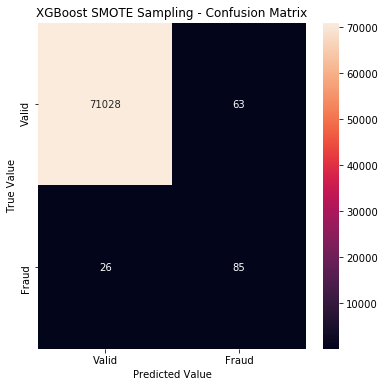

In [47]:
labels= ['Valid', 'Fraud'] 
conf_matrix=confusion_matrix(ytest,xgb_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("XGBoost SMOTE Sampling - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

In [48]:
# NN


In [49]:

# Split into Train / Test Sets
x=cc_df.drop(columns='Class',axis=1)
print(x)

y=cc_df[['Class']].copy()
print(y)

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [50]:

# Oversampling (Smote) + Random Forest 
xsmote,ysmote=SMOTE(random_state=1,sampling_strategy=1.0).fit_resample(xtrain,ytrain)

print(xsmote)
print(ysmote)

                 Time         V1        V2         V3        V4        V5  \
0       159708.000000  -0.459482  1.198230   2.315423  4.274698  0.603004   
1       129139.000000   1.878563  0.020785  -1.621113  2.908813  2.507847   
2         4263.000000  -1.467414  1.210542   1.891733 -0.282189 -0.214526   
3       113041.000000   2.073474 -0.147624  -1.495803  0.184499  0.107505   
4        77352.000000   1.097497  0.357207   1.051187  2.631217 -0.464023   
...               ...        ...       ...        ...       ...       ...   
426443   41233.586829 -10.355998  6.092424 -13.081348  7.333507 -9.550066   
426444   35886.873089  -2.813944  3.771450  -3.775914  5.561832 -3.589699   
426445  143237.936649  -1.408302  2.508873  -2.686728  4.111950  0.516272   
426446  129738.321857  -1.581447  2.974258  -6.213306  3.656808 -0.810412   
426447  150719.013410  -0.261952  1.361121  -2.416682  3.613812  0.951105   

              V6         V7        V8        V9  ...       V20       V21  \

In [51]:
mlpc=MLPClassifier(hidden_layer_sizes=(100,),max_iter=100)
mlpc.fit(xsmote,ysmote.values.ravel())

/Users/fareedfreihat/opt/anaconda3/envs/dev/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(max_iter=100)

In [52]:
mlpc_pred=mlpc.predict(xtest)
print(classification_report_imbalanced(ytest,mlpc_pred))
print(confusion_matrix(ytest,mlpc_pred))
print(accuracy_score(ytest,mlpc_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.83      1.00      0.91      0.84     71091
          1       0.24      0.83      1.00      0.38      0.91      0.81       111

avg / total       1.00      1.00      0.83      1.00      0.91      0.84     71202

[[70804   287]
 [   19    92]]
0.9957023679110137


In [53]:
roc_auc_score(ytest, mlpc_pred)

0.9123958747961786

In [54]:
f1_score(ytest, mlpc_pred)

0.37551020408163266

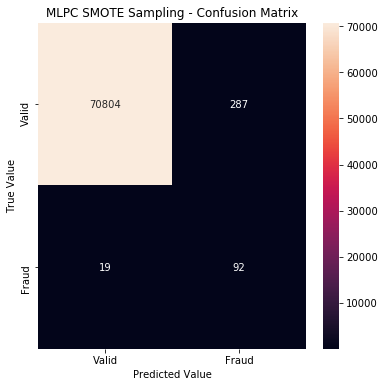

In [55]:
labels= ['Valid', 'Fraud'] 
conf_matrix=confusion_matrix(ytest,mlpc_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("MLPC SMOTE Sampling - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

In [ ]:
# Balanced Random Forest

In [89]:
# Split into Train / Test Sets
x_brf=cc_df.drop(columns='Class',axis=1)
print(x)

y_brf=cc_df[['Class']].copy()
print(y)

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [90]:
# Oversampling (Smote) + Random Forest 
xsmote,ysmote=SMOTE(random_state=1,sampling_strategy=1.0).fit_resample(xtrain,ytrain)

print(xsmote)
print(ysmote)

                 Time         V1        V2         V3        V4        V5  \
0       159708.000000  -0.459482  1.198230   2.315423  4.274698  0.603004   
1       129139.000000   1.878563  0.020785  -1.621113  2.908813  2.507847   
2         4263.000000  -1.467414  1.210542   1.891733 -0.282189 -0.214526   
3       113041.000000   2.073474 -0.147624  -1.495803  0.184499  0.107505   
4        77352.000000   1.097497  0.357207   1.051187  2.631217 -0.464023   
...               ...        ...       ...        ...       ...       ...   
426443   41233.586829 -10.355998  6.092424 -13.081348  7.333507 -9.550066   
426444   35886.873089  -2.813944  3.771450  -3.775914  5.561832 -3.589699   
426445  143237.936649  -1.408302  2.508873  -2.686728  4.111950  0.516272   
426446  129738.321857  -1.581447  2.974258  -6.213306  3.656808 -0.810412   
426447  150719.013410  -0.261952  1.361121  -2.416682  3.613812  0.951105   

              V6         V7        V8        V9  ...       V20       V21  \

In [91]:
brf=BalancedRandomForestClassifier(n_estimators=100,random_state=1)
brf.fit(xsmote,ysmote.values.ravel())

BalancedRandomForestClassifier(random_state=1)

In [92]:
brf_pred=brf.predict(xtest)
print(classification_report_imbalanced(ytest,brf_pred))
print(accuracy_score(ytest,brf_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.78      1.00      0.89      0.80     71091
          1       0.85      0.78      1.00      0.82      0.89      0.77       111

avg / total       1.00      1.00      0.78      1.00      0.89      0.80     71202

0.9994522625768939


In [93]:
roc_auc_score(ytest, brf_pred)

0.891786393305573

In [94]:
f1_score(ytest, brf_pred)

0.8169014084507041

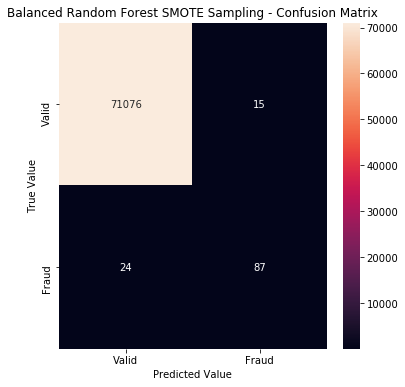

In [96]:
labels= ['Valid', 'Fraud'] 
conf_matrix=confusion_matrix(ytest,brf_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Balanced Random Forest SMOTE Sampling - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

In [ ]:
# Decision Tree Classifier

In [102]:
# Split into Train / Test Sets
x_DTC=cc_df.drop(columns='Class',axis=1)
print(x)

y_DTC=cc_df[['Class']].copy()
print(y)

xtrain,xtest,ytrain,ytest=train_test_split(x_DTC,y_DTC,random_state=1)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [103]:
clf=DecisionTreeClassifier(random_state=0)

In [104]:
# No Sampling
clf.fit(xtrain,ytrain.values.ravel())
clf_pred=clf.predict(xtest)
print(classification_report_imbalanced(ytest,clf_pred))
print(accuracy_score(ytest,clf_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.72      1.00      0.85      0.74     71091
          1       0.70      0.72      1.00      0.71      0.85      0.70       111

avg / total       1.00      1.00      0.72      1.00      0.85      0.74     71202

0.9990871042948232


In [105]:
roc_auc_score(ytest, clf_pred)

0.8601212302313708

In [106]:
f1_score(ytest, clf_pred)

0.7111111111111111

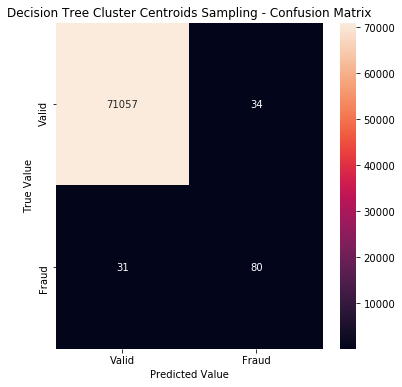

In [107]:
labels= ['Valid', 'Fraud'] 
conf_matrix=confusion_matrix(ytest,clf_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Decision Tree Cluster Centroids Sampling - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

In [108]:
## Performance Plot
auc_scores={
    'Isolation Forest': roc_auc_score(Y, y_pred),
    'XGboost':roc_auc_score(ytest, xgb_pred),
    'Neural Networks':roc_auc_score(y_test, mlpc_pred),
    'Balanced Random Forest': roc_auc_score(y_test, brf_pred),
    'Decision Tree Classifier': roc_auc_score(ytest,clf_pred)
}

f1_scores={
    'Isolation Forest':f1_score(Y, y_pred),
    'XGboost':f1_score(ytest, xgb_pred),
    'Neural Networks':f1_score(ytest, mlpc_pred),
    'Balanced Random Forest': f1_score(y_test, brf_pred),
    'Decision Tree Classifier': roc_auc_score(ytest,clf_pred)
}


Text(0.5, 0, 'AUC Score')

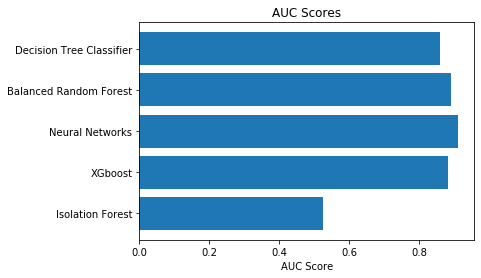

In [109]:
pyplot.title('AUC Scores')
pyplot.barh(range(len(auc_scores)), list(auc_scores.values()), align='center')
pyplot.yticks(range(len(auc_scores)), list(auc_scores.keys()))
pyplot.xlabel('AUC Score')


Text(0.5, 0, 'F1 Score')

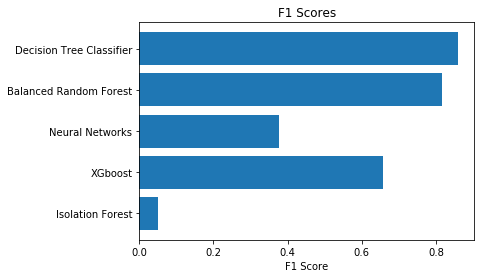

In [110]:
pyplot.title('F1 Scores')
pyplot.barh(range(len(f1_scores)), list(f1_scores.values()), align='center')
pyplot.yticks(range(len(f1_scores)), list(f1_scores.keys()))
pyplot.xlabel('F1 Score')